In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd


# Find project root and add 'src' folder to sys.path
project_root = Path.cwd().parents[0]  # goes from /notebooks/ to project root
src_path = project_root / 'src'
sys.path.append(str(src_path))

In [2]:
from data_fetching.fetch_yfinance import get_price_data

tickers = [
    #"MCD",   # McDonald's (largest fast food chain)
    "SBUX",  # Starbucks (global coffee leader)
    "CMG",   # Chipotle (fast-casual leader)
    "YUM",   # Yum! Brands (KFC, Taco Bell, Pizza Hut)
    "QSR",   # Restaurant Brands Int'l (Burger King, Popeyes, Tim Hortons)
    #"DPZ",   # Domino's Pizza (global pizza delivery leader)
    #"WEN",   # Wendy's (major burger chain)
    "SHAK",  # Shake Shack (premium fast-casual)
    "PZZA",  # Papa John's (pizza chain)
]
market = "^GSPC"
start_date = '2020-01-01'
end_date = '2025-05-31'

stock_prices = get_price_data(tickers, start_date, end_date)
market_prices = get_price_data(market, start_date, end_date)
print(stock_prices.info)
print(market_prices.info)

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed

<bound method DataFrame.info of Ticker            CMG       PZZA        QSR       SBUX        SHAK         YUM
Date                                                                          
2020-01-02  17.163799  55.727364  53.804115  79.306679   61.130001   92.200233
2020-01-03  17.302601  56.108952  53.587902  78.845131   60.490002   91.911446
2020-01-06  17.160400  57.280285  52.481876  78.223801   59.560001   91.857307
2020-01-07  17.201599  56.490517  52.714722  77.984161   61.299999   92.019730
2020-01-08  17.134600  57.289173  51.899761  78.889496   62.029999   92.182175
...               ...        ...        ...        ...         ...         ...
2025-05-23  50.630001  42.250000  70.070000  84.400002  117.620003  144.740005
2025-05-27  50.990002  44.310001  71.599998  87.010002  126.349998  144.089996
2025-05-28  50.070000  43.590000  71.800003  86.000000  126.570000  143.149994
2025-05-29  49.730000  43.820000  70.699997  84.050003  126.639999  144.039993
2025-05-30  50.08000

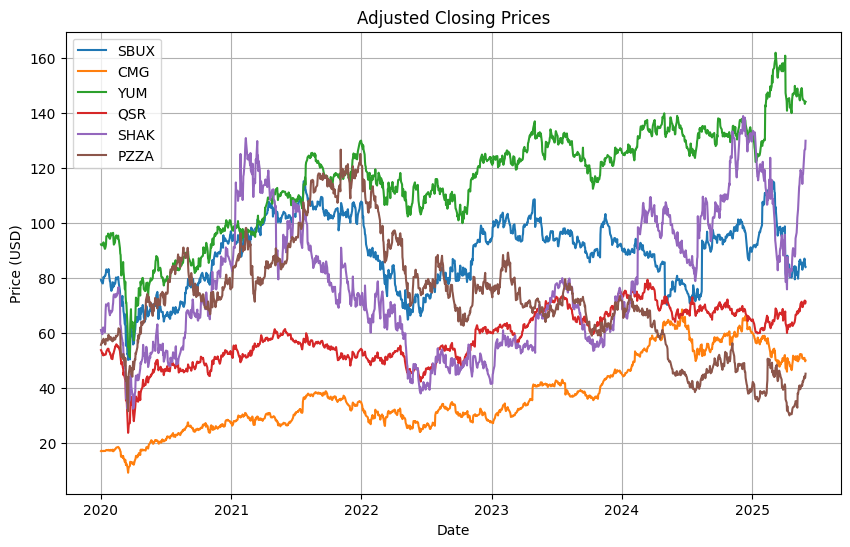

In [3]:
#Matplotlib adjusted closing price visualization
plt.figure(figsize=(10,6))
for ticker in tickers:
    plt.plot(stock_prices.index, stock_prices[ticker], label=ticker)

plt.title('Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

This is all well and good, but to do a proper portfolio optimization program, **we need returns data, not prices data**. That was just practice. To use Markowitz's Model, we need to understand these key concepts:

1. **Expected Return (Mean Return):**  
   The average return you expect from an asset over time.

2. **Risk (Covariance and Standard Deviation):**  
   How much returns fluctuate. More variance means more risk.

3. **Covariance / Correlation:**  
   How two assets move relative to each other. If they move perfectly together (correlation = 1), diversification benefits are low. If they move differently or opposite (correlation < 1), risk can be reduced by combining them.

4. **Portfolio Return:**  
   Weighted sum of expected returns of individual assets.

5. **Portfolio Variance:**  
   Weighted sum of variances and covariances, capturing total risk.

---

### Why Multiple Methods Are Needed to Calculate Returns (Simple vs CAPM)

Calculating returns is not a one-size-fits-all process. Different methods capture different aspects of risk and return, and using multiple approaches helps build a more robust and realistic portfolio model:

- **Simple Returns** (also called historical or arithmetic returns) are straightforward calculations based on actual past price changes. They reflect the pure percentage change in asset prices over time and are useful for understanding past performance and short-term trends.

- **CAPM (Capital Asset Pricing Model) Returns** incorporate the relationship between an asset’s return and overall market risk (systematic risk). CAPM helps estimate the *expected* return based on the asset’s beta (sensitivity to market movements), the risk-free rate, and the market risk premium. This is crucial for forward-looking portfolio optimization where market risk factors must be considered.

Using both methods together allows you to:

- Ground your analysis in historical data with simple returns, ensuring your model reflects actual observed price behavior.
- Adjust for market-wide risks and expected returns via CAPM, providing a theoretically sound, risk-adjusted estimate of returns.

This combination leads to better-informed decisions when optimizing your portfolio, balancing historical realities with forward-looking expectations.

---

### Data Needed for Markowitz Model Implementation

- **Returns data, not prices:**  
  Returns measure the percentage change in asset value over your chosen frequency (daily, monthly, etc.). Prices alone don’t capture the true investment gain or loss.

- **Mean returns vector:**  
  The average return of each asset over the analysis period.

- **Covariance matrix:**  
  Measures how asset returns move together, essential for calculating portfolio risk and diversification benefits.


In [4]:
#Calculations

from returns.historical import(
    calculate_daily_returns,
    calculate_mean_returns,
    annualize_returns,
    calculate_covariance_matrix
)
trading_days = stock_prices.shape[0]
risk_free_rate = 0.04
daily_risk_free_rate = risk_free_rate/trading_days

#For Stocks
daily_returns = calculate_daily_returns(stock_prices, use_log=True)
print(daily_returns)
expected_returns = calculate_mean_returns(daily_returns)
print(expected_returns)
annual_returns = annualize_returns(expected_returns, trading_days)
print(annual_returns)
cov_matrix = calculate_covariance_matrix(daily_returns)
print(cov_matrix)

#For Market
daily_mkt_returns = calculate_daily_returns(market_prices, use_log=True)
print(daily_mkt_returns)
mean_mkt_returns = calculate_mean_returns(daily_mkt_returns)
print(mean_mkt_returns)

Ticker           CMG      PZZA       QSR      SBUX      SHAK       YUM
Date                                                                  
2020-01-03  0.008054  0.006824 -0.004027 -0.005837 -0.010525 -0.003137
2020-01-06 -0.008252  0.020661 -0.020855 -0.007912 -0.015494 -0.000589
2020-01-07  0.002398 -0.013884  0.004427 -0.003068  0.028796  0.001767
2020-01-08 -0.003903  0.014039 -0.015581  0.011542  0.011838  0.001764
2020-01-09  0.006909  0.011090  0.006548  0.018394 -0.014125  0.007898
...              ...       ...       ...       ...       ...       ...
2025-05-23 -0.002958 -0.006605  0.009176  0.005108  0.002810 -0.000344
2025-05-27  0.007085  0.047606  0.021600  0.030456  0.071597 -0.004501
2025-05-28 -0.018208 -0.016383  0.002789 -0.011676  0.001740 -0.006545
2025-05-29 -0.006814  0.005263 -0.015439 -0.022935  0.000553  0.006198
2025-05-30  0.007013  0.032112  0.009992 -0.001191  0.024569 -0.000694

[1359 rows x 6 columns]
Ticker
CMG     0.000788
PZZA   -0.000153
QSR     0.0

In [5]:
#CAPM
from returns.capm import(
    calculate_excess_returns,
    run_capm_regression,
    calculate_expected_return_capm
)
stock_excess_returns = calculate_excess_returns(daily_returns, daily_risk_free_rate)
print(stock_excess_returns)
df_alphas_betas = run_capm_regression(daily_returns, daily_mkt_returns)
print(df_alphas_betas)

expected_returns_capm = calculate_expected_return_capm(
    beta=df_alphas_betas['beta'], 
    market_return=mean_mkt_returns, 
    risk_free_rate=risk_free_rate
)

print(expected_returns_capm)

Ticker           CMG      PZZA       QSR      SBUX      SHAK       YUM
Date                                                                  
2020-01-03  0.008025  0.006795 -0.004056 -0.005866 -0.010554 -0.003167
2020-01-06 -0.008282  0.020632 -0.020885 -0.007941 -0.015523 -0.000619
2020-01-07  0.002369 -0.013913  0.004397 -0.003098  0.028766  0.001737
2020-01-08 -0.003932  0.014009 -0.015610  0.011513  0.011809  0.001734
2020-01-09  0.006880  0.011061  0.006518  0.018365 -0.014154  0.007869
...              ...       ...       ...       ...       ...       ...
2025-05-23 -0.002988 -0.006635  0.009146  0.005078  0.002780 -0.000373
2025-05-27  0.007056  0.047577  0.021571  0.030426  0.071567 -0.004530
2025-05-28 -0.018237 -0.016412  0.002760 -0.011705  0.001710 -0.006575
2025-05-29 -0.006843  0.005233 -0.015468 -0.022965  0.000523  0.006169
2025-05-30  0.006984  0.032083  0.009963 -0.001220  0.024540 -0.000724

[1359 rows x 6 columns]
           alpha      beta
Ticker                   

Now that we have calculated these numbers, we will build a basic model that maximizes <b>sharpe ratio</b>. 
<br>
<br>
### **What is Sharpe Ratio?**
Sharpe Ratio = (Portfolio Return - Risk Free Rate)/Portfolio Risk (or Standard Deviation)
<br>
<br>
-Portfolio Return: How much your portfolio is expected to grow
<br>
-Risk-Free Rate: What you'd earn doing nothing risky (e.g., government bonds)
<br>
-Portfolio Risk: How much the returns bounce around (volatility)
<br>
The Sharpe ratio measures how much return you're getting for each unit of risk you take.
<br>
| Sharpe Ratio | Interpretation           |
| ------------ | ------------------------- |
| < 1.0        | Poor risk-adjusted return |
| \~1.0        | Acceptable                |
| > 1.0        | Good                      |
| > 2.0        | Very Good                 |
| > 3.0        | Excellent                 |

### **Volatility Classification (Annualized Standard Deviation)**  
*(For stocks/portfolios, based on historical equity markets)*  

| Volatility Range  | Classification       | Interpretation                          | Example Assets                          |
|-------------------|----------------------|-----------------------------------------|-----------------------------------------|
| **< 10%**         | Very Low Volatility  | Cash-like stability                    | T-bills, utility stocks, low-vol ETFs  |
| **10–15%**        | Low Volatility       | Defensive, low sensitivity to markets  | Consumer staples, blue-chip dividends  |
| **15–20%**        | Moderate Volatility  | Typical diversified portfolio          | S&P 500, balanced mutual funds        |
| **20–30%**        | High Volatility      | Aggressive growth/sector risk          | Tech stocks, small-caps               |
| **30–50%**        | Very High Volatility | Speculative, large swings              | Meme stocks, crypto, biotech          |
| **> 50%**         | Extreme Volatility   | Casino-level risk                      | Penny stocks, 3x leveraged ETFs       |

### **Notes:**  
- **S&P 500** historically: ~15–20%  
- **Bonds**: 5–10% | **Crypto (BTC)**: 60–100%  
- High volatility (>25%) = common for single stocks, rare for diversified portfolios.  



In [6]:
import numpy as np

#Sharpe Ratio Function (Also stored in src/analysis/sharpe_analysis.py, I put it here just for showcase purposes)
def calc_sharpe_ratio(total_investment, tickers, weights, mean_stock_returns, cov_matrix, trading_days, risk_free_rate=0.044):
    portfolio_return = np.dot(weights, mean_stock_returns) * trading_days #np.dot used for multiplication, if array are both 2D then it does matrix multiplication. already annualized.
    
    portfolio_volatility = (np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(trading_days))*100 #percentage
    
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility #calculates Sharpe Ratio

    weights_df = pd.DataFrame(data=weights, index=tickers, columns=['Weight']) #how much weight each asset has

    weights_df['Weight'] = weights_df['Weight'] * 100  # convert to percent

    # Calculate dollar allocation per stock
    weights_df['USD Allocation'] = weights_df['Weight'] * total_investment

    # Reorder columns for clarity
    weights_df = weights_df[['Weight', 'USD Allocation']]

    weights_df['Projected Return ($)'] = portfolio_return*weights_df['USD Allocation']
    weights_df = weights_df[['Weight', 'USD Allocation', 'Projected Return ($)']]

    total_projected_return_usd = weights_df['Projected Return ($)'].sum()


    print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

    
    if sharpe_ratio < 1.0:
        print("Sharpe Ratio Intepretation: Poor risk adjusted return")
    elif sharpe_ratio == 1.0:
        print("Sharpe Ratio Intepretation: Acceptable")
    elif sharpe_ratio > 1.0:
        print("Sharpe Ratio Intepretation: Good")
    elif sharpe_ratio > 2.0:
        print("Sharpe Ratio Intepretation: Very good")
    elif sharpe_ratio > 3.0:
        print("Sharpe Ratio Intepretation: Excellent")
    

    print(f"Portfolio Return: {portfolio_return:.4f}")

    print(f"Portfolio Volatility: {portfolio_volatility:.4f}%")

    if portfolio_volatility < 10:
        print("Volatility Intepretation: Cash-like stability")
    elif portfolio_volatility < 15:
        print("Volatility Intepretation: Defensive, low sensitivity to markets")
    elif portfolio_volatility < 20:
        print("Volatility Intepretation: Typical diversified portfolio")
    elif portfolio_volatility < 30:
        print("Volatility Intepretation: Aggressive growth/sector risk ")
    elif portfolio_volatility < 50:
        print("Volatility Intepretation: Speculative, large swings")
    elif portfolio_volatility > 50:
        print("Volatility Intepretation: Casino-level risk")
    
    print("Portfolio Weights (%):")
    
    print(weights_df)

    print(f"Total Projected Returns ($): {total_projected_return_usd:.2f}")



In [7]:
#We will now call the function here.
total_investment = 1000 #USD amount we are investing

n = len(expected_returns_capm)
weights = np.array([1/n] * n) #How much of each stock we are buying essentially. (assuming we buy equal amounts of each stock)

from analysis.sharpe_analysis import calc_sharpe_ratio

calc_sharpe_ratio(
    expected_returns=expected_returns_capm,
    weights=weights,
    cov_matrix=cov_matrix,
    trading_days=trading_days,
    risk_free_rate=risk_free_rate
)


Sharpe Ratio: 0.0358
Sharpe Ratio Interpretation: Poor risk-adjusted return
Portfolio Volatility: 63.74%
Volatility Interpretation: Casino-level risk


(0.03584083560230295, 63.74420559125985)

This is awesome and all, but, we need to actually make this program optimize the weights on its own to make it a Portfolio "Optimizer", so let's do that

In [8]:
from optimization.markowitz import optimize_portfolio

weights_df = optimize_portfolio(expected_returns_capm, cov_matrix, risk_free_rate, trading_days)
pd.options.display.float_format = '{:,.20f}'.format 
print(weights_df)

Ticker
CMG    0.00000000000315637299
PZZA   0.11356009879845328781
QSR    0.00000000000239963821
SBUX   0.00000000001785259946
SHAK   0.00000000004603767671
YUM    0.88643990113210036075
dtype: float64


Let's do some projected dollar values. basically how much money you would get if you did what my optimizer told you to!

In [9]:
from evaluation.project_returns import project_returns_in_dollars

projection_df = project_returns_in_dollars(
    weights_df,
    expected_returns_capm,
    trading_days,
    1000,
)

print(projection_df)


                    Weight (%)             USD Allocation  \
CMG     0.00000000000000000000     0.00000000000000000000   
PZZA   11.35999999999999943157   113.56000000000000227374   
QSR     0.00000000000000000000     0.00000000000000000000   
SBUX    0.00000000000000000000     0.00000000000000000000   
SHAK    0.00000000000000000000     0.00000000000000000000   
YUM    88.64000000000000056843   886.44000000000005456968   
TOTAL 100.00000000000000000000 1,000.00000000000000000000   

              Expected Return ($)  
CMG        0.00000000000000000000  
PZZA   1,427.20000000000004547474  
QSR        0.00000000000000000000  
SBUX      -0.00000000000000000000  
SHAK      -0.00000000000000000000  
YUM   13,262.65999999999985448085  
TOTAL 14,689.86000000000058207661  
